<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/06_MachineLearning/blob/main/02_Advanced/03_DeepLearning_PredictionsWithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Making predictions using Keras

In this course, we will learn how to make predictions for time series using Keras. First, we will understand how the data should be structured for predictions. Then, we will use a Neural Network for regression. Finally, we will understand what Recurrent Neural Networks are, and we will be able to make predictions using a LSTM and a GRU.

In this course, we will use the following packages:

In [ ]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

Also, we will try to predict new values from this dataset:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')
df.columns = ['time', 'passengers']

df.head( )

,time,passengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In this dataframe, we have two columns: one with the time, and another with the number of passengers. Thus, we have a time series. The time feature represents the year, where the decimal places represents the fraction of the year.

Let's visualize our time series:



In [ ]:
mpl.rcParams['figure.figsize'] = (14, 6)
mpl.rcParams['font.size'] = 16

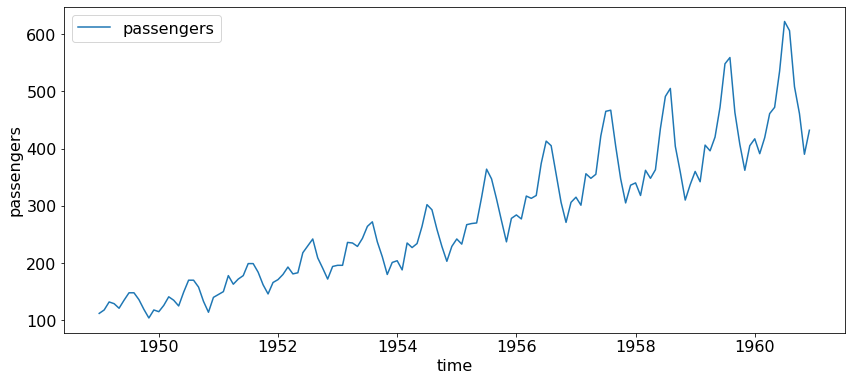

In [ ]:
sns.lineplot(x = 'time', y = 'passengers', data = df, label = 'passengers')

# Changing our data structure

In this course, we will use neural networks to fit our data and perform predictions. Thus, we have to change our dataset in a way that it becomes easier for our NN to understand it. 

First, we should normalize our data. We can do that using:

In [ ]:
scaler = MinMaxScaler( )
df_scaled = scaler.fit_transform(df)

Now, let's define our explicative and target features. Our explicative features in the time, and our target is the number of passengers (which we will try to predict. Thus:

In [ ]:
X = df_scaled[:, 0]
y = df_scaled[:, 1]

Let's visualize our normalized data:

Text(0.5, 0, 'year (norm)')

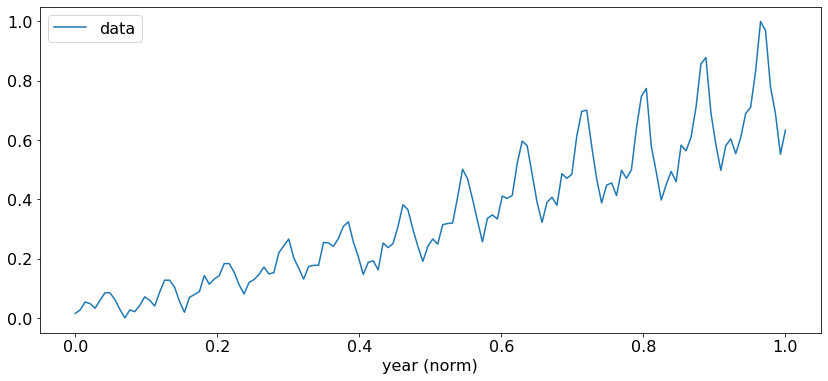

In [ ]:
sns.lineplot(x = X, y = y, label = 'data')
plt.xlabel('passengers (norm)')
plt.xlabel('year (norm)')

Nice! Now, let's separe our training and test sets. Here, our test set will be the final 10% entries. Thus, we will fit our model based on the first 90% entries, and then we will try to forecast the number of passengers for the rest. Then, we will be able to compare the real result with our prediction. 

Thus, we can do:

In [ ]:
train_size = int(len(X)*0.9)

X_train = X[:train_size]
y_train = y[:train_size]

X_test  = X[train_size:]
y_test  = y[train_size:]

Let's check by plotting both sets:

Text(0, 0.5, 'passengers (norm)')

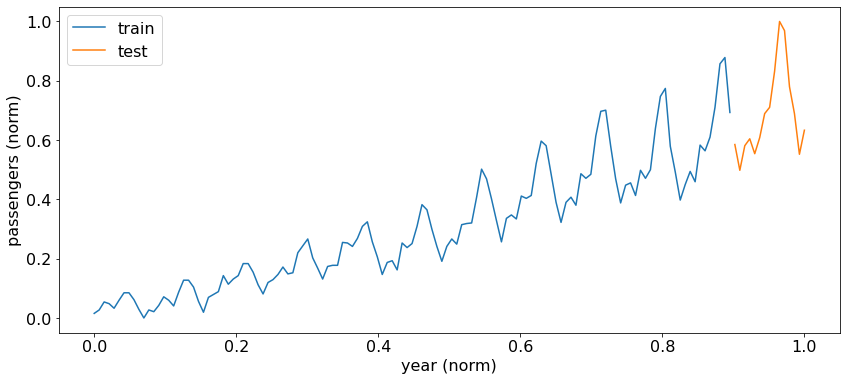

In [ ]:
sns.lineplot(x = X_train, y = y_train, label = 'train')
sns.lineplot(x = X_test, y = y_test, label = 'test')
plt.xlabel('year (norm)')
plt.ylabel('passengers (norm)')

Nice! Everything seems to be working out fine. 

# Trying to predict the future

Now, let's try to perform a first prediction of our future data. First, we will start by using an usual linear regression, built using a Neural Network (using Keras). For that end, we can build a neural network using only one neuron on the first layer (with a bias and a weight), and one neuron on the final layer. Thus, we do:

In [ ]:
lr_nn = keras.models.Sequential([
                                 keras.layers.Dense(1, input_dim = 1, kernel_initializer = 'Ones', activation = 'linear')   
])

callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)]

lr_nn.compile(loss = 'mean_squared_error', optimizer = 'adam')

lr_nn.summary( )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


So, we have a sequential neural network with two parameters (which are basically the two parameters from a linear regression: $a$ and $b$). We then fit our model using:

In [ ]:
lr_nn.fit(X_train, y_train, epochs = 200, validation_split = 0.2, callbacks = callbacks, verbose = 0)

Finally, let's get our prediction on the training set:

In [ ]:
y_pred = lr_nn.predict(X_train)[:, 0]

Text(0, 0.5, 'passengers (norm)')

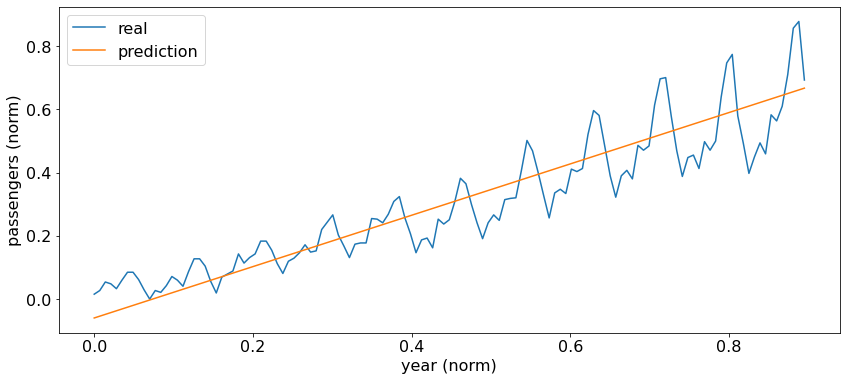

In [ ]:
sns.lineplot(x = X_train, y = y_train, label = 'real')
sns.lineplot(x = X_train, y = y_pred, label = 'prediction')
plt.xlabel('year (norm)')
plt.ylabel('passengers (norm)')

Nice! We got a line that seems to represent our real data. However, we are not getting the number of passengers, but rather the normalized number of passengers. To get the real target, we can undo the normalization:

In [ ]:
y_pred_df = pd.DataFrame({'t' : X_train, 'y_pred' : y_pred})

y_pred_df_transf = pd.DataFrame(scaler.inverse_transform(y_pred_df), columns = ['t', 'y_pred'])

Nice! Now, let's plot our results:

Text(0, 0.5, 'passengers')

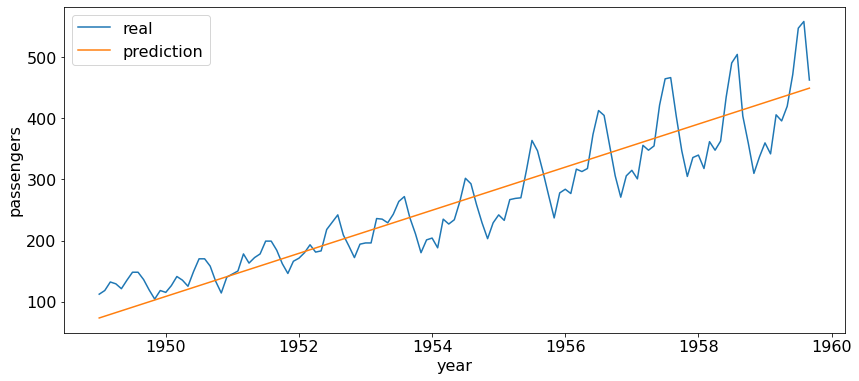

In [ ]:
sns.lineplot(x = 'time', y = 'passengers', data = df[:train_size], label = 'real')
sns.lineplot(x = 't', y = 'y_pred', data = y_pred_df_transf, label = 'prediction')
plt.xlabel('year')
plt.ylabel('passengers')

Finally, let's try to perform predictions on the test set. For that end, we may do:

In [ ]:
y_pred_test = lr_nn.predict(X_test)[:, 0]

Text(0, 0.5, 'passengers (norm)')

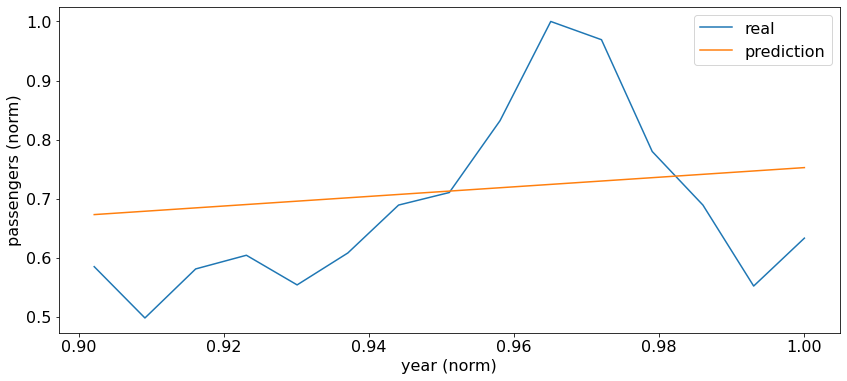

In [ ]:
sns.lineplot(x = X_test, y = y_test, label = 'real')
sns.lineplot(x = X_test, y = y_pred_test, label = 'prediction')
plt.xlabel('year (norm)')
plt.ylabel('passengers (norm)')

So, we also have a line (which is expected, since we have a linear regression). Now, let's plot everything together:

In [ ]:
y_pred_test_df = pd.DataFrame({'t' : X_test, 'y_pred' : y_pred_test})

y_pred_test_df_transf = pd.DataFrame(scaler.inverse_transform(y_pred_test_df), columns = ['t', 'y_pred'])

Text(0, 0.5, 'passengers')

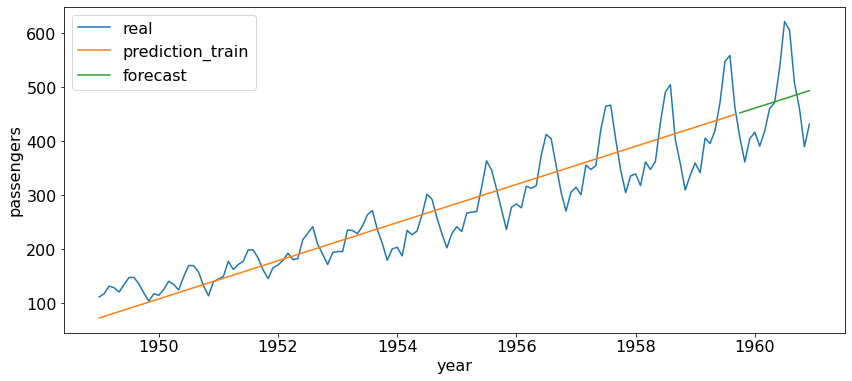

In [ ]:
sns.lineplot(x = 'time', y = 'passengers', data = df, label = 'real')
sns.lineplot(x = 't', y = 'y_pred', data = y_pred_df_transf, label = 'prediction_train')
sns.lineplot(x = 't', y = 'y_pred', data = y_pred_test_df_transf, label = 'forecast')
plt.xlabel('year')
plt.ylabel('passengers')

It seems that our linear regression is a good estimator for the general trend of our model. However, we are not able to trully predict the seasonal factor on our data, nor the noise. 

To improve our model, we may try to make our model more complex. First, let's create a user defined function to plot this figure from the fitted model:

In [ ]:
def PlotForecast(fitted_model, scaler, X_train, X_test, y_train, y_test):
  y_pred_train = fitted_model.predict(X_train)[:, 0]
  y_pred_train_df = pd.DataFrame({'t' : X_train, 'y_pred' : y_pred_train})
  y_pred_train_df_transf = pd.DataFrame(scaler.inverse_transform(y_pred_train_df), columns = ['t', 'y_pred'])

  y_pred_test = fitted_model.predict(X_test)[:, 0]
  y_pred_test_df = pd.DataFrame({'t' : X_test, 'y_pred' : y_pred_test})
  y_pred_test_df_transf = pd.DataFrame(scaler.inverse_transform(y_pred_test_df), columns = ['t', 'y_pred'])

  sns.lineplot(x = 'time', y = 'passengers', data = df, label = 'real')
  sns.lineplot(x = 't', y = 'y_pred', data = y_pred_train_df_transf, label = 'prediction_train')
  sns.lineplot(x = 't', y = 'y_pred', data = y_pred_test_df_transf, label = 'forecast')
  plt.xlabel('year')
  plt.ylabel('passengers')

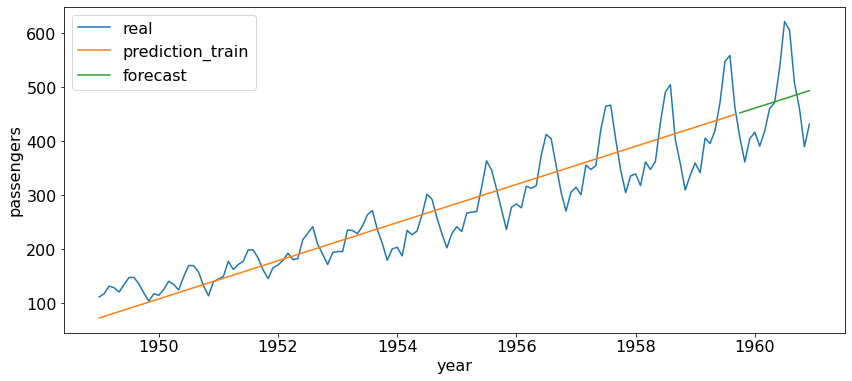

In [ ]:
PlotForecast(lr_nn, scaler, X_train, X_test, y_train, y_test)

Nice! Everything seems to have worked out. Now, let's continue to make our model more complex.

# Making our Neural Network more complex

To make our model more complex, we will add more layers and more neurons to our network. Each connection between our neurons will have a weight, and each neuron will have a bias associated with it. 

We can build this new model using:

In [ ]:
SEED = 101
tf.random.set_seed(SEED)

model = keras.models.Sequential([
                                 keras.layers.Dense(8, input_dim = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'), 
                                 keras.layers.Dense(8, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'),
                                 keras.layers.Dense(1, kernel_initializer = 'glorot_uniform', activation = 'linear')
])

callbacks = [keras.callbacks.EarlyStopping(monitor = 'loss', patience = 100)]

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary( )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 16        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


Now, our model has one layer with 8 neurons, a second layer with another 8 neurons, and an output layer (with only one neuron). Before, our model only had 2 parameters. Now, it has 97. Also, we changed our activation function from a linear function to a sigmoid function. This introduces a non-linearity into our model. The change in the kernel initializer also makes it harder for our model to suffer from gradient explosion or vanishing gradients. Let's fit our Neural Network:

In [ ]:
model.fit(X_train, y_train, epochs = 200, callbacks = callbacks, verbose = 0)

Finally, let's plot our forecast with the new model:

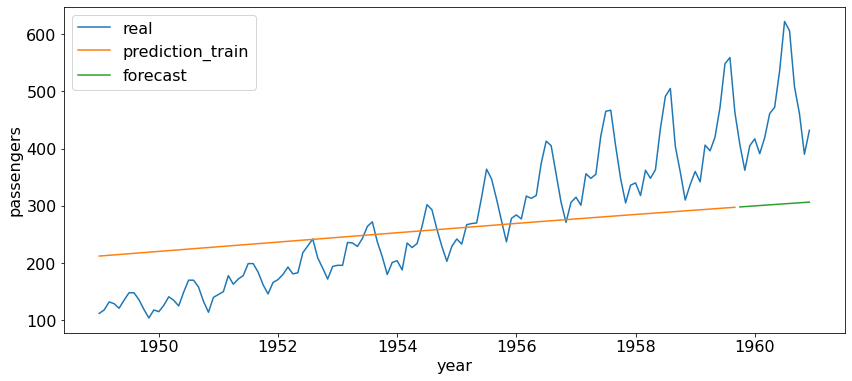

In [ ]:
PlotForecast(model, scaler, X_train, X_test, y_train, y_test)

Note that, even though we increased the complexity of our model, it seems that we are not being able to fit our model to the data.

# Another way to think about the forecasting problem

Instead of passing the time and trying to predict the number of passengers, we can think of our problem in another way: we can try to pass the number of passengers, and try to predict the number of passengers in the next step. That is, our input is the same as our output, but lagged. This is very usual for time series prediction problems. 

Let's try to define the new explicative and target features. First, let's get the lagged number of passengers:

In [ ]:
def separate_data(vector, n_lags):
  X_new, y_new = [], []

  for i in range(n_lags, vector.shape[0]):
    X_new.append( list(vector.loc[(i - n_lags):i - 1]) )
    y_new.append(vector.loc[i])

  X_new, y_new = np.array(X_new), np.array(y_new)
  return X_new, y_new

Note that we will get the number of passengers lagged, which was our $y$ before. Thus, we can get our train and test sets using:

In [ ]:
vector = pd.DataFrame(y_train)[0]

X_train_new, y_train_new = separate_data(vector, 1)

In [ ]:
vector = pd.DataFrame(y_test)[0]

X_test_new, y_test_new = separate_data(vector, 1)

Finally, let's create a new Neural Network:

In [ ]:
SEED = 101
tf.random.set_seed(SEED)

model = keras.models.Sequential([
                                 keras.layers.Dense(8, input_dim = 1, kernel_initializer = 'glorot_uniform', activation = 'linear'), 
                                 keras.layers.Dense(64, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'),
                                 keras.layers.Dense(1, kernel_initializer = 'glorot_uniform', activation = 'linear')
])

callbacks = [keras.callbacks.EarlyStopping(monitor = 'loss', patience = 100)]

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary( )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 16        
                                                                 
 dense_5 (Dense)             (None, 64)                576       
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


Ok. Note that, here, we used 64 neurons in the second layer. Thus, we have 657 parameters. Finally, fitting our model:

In [ ]:
model.fit(X_train_new, y_train_new, epochs = 200, callbacks = callbacks, verbose = 0)

Now, let's change our ```PlotForecast( )``` function:

In [ ]:
def PlotForecast(fitted_model, dataset, scaler, X_train, X_test, y_train, y_test, lag):
  y_pred_train = fitted_model.predict(X_train)[:, 0]
  y_pred_train_df = pd.DataFrame({'t' :  df_scaled[lag:len(X_train)+lag, 0], 'y_pred' : y_pred_train})
  y_pred_train_df_transf = pd.DataFrame(scaler.inverse_transform(y_pred_train_df), columns = ['t', 'y_pred'])

  y_pred_test = fitted_model.predict(X_test)[:-lag, 0]
  y_pred_test_df = pd.DataFrame({'t' :  df_scaled[-len(X_test):-lag, 0], 'y_pred' : y_pred_test})
  y_pred_test_df_transf = pd.DataFrame(scaler.inverse_transform(y_pred_test_df), columns = ['t', 'y_pred'])

  sns.lineplot(x = 'time', y = 'passengers', data = dataset[lag:], label = 'real')
  sns.lineplot(x = 't', y = 'y_pred', data = y_pred_train_df_transf, label = 'prediction_train')
  sns.lineplot(x = 't', y = 'y_pred', data = y_pred_test_df_transf, label = 'forecast')
  plt.xlabel('year')
  plt.ylabel('passengers')

Now, let's plot our prediction:

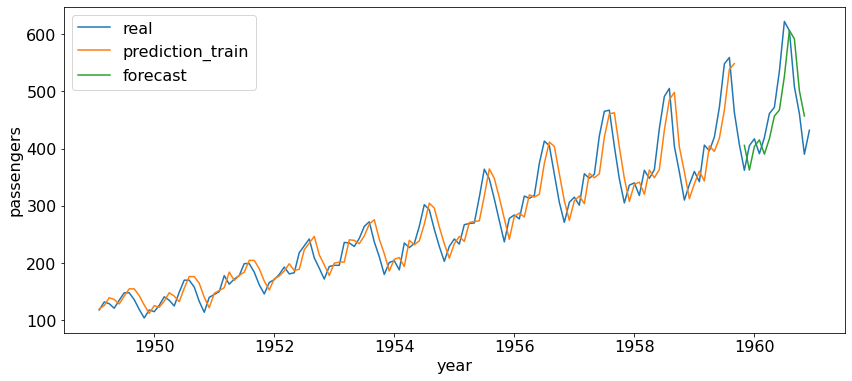

In [ ]:
PlotForecast(model, df, scaler, X_train_new, X_test_new, y_train_new, y_test_new, 1)

Nice! Now, it seems that our model is representing our true function much better. However, our prediction seems to be lagged.

## Testing more shifts

Note that, here, we used only 1 shift. What happens if we increase the number of shifts? Also, what happens if we consider multiple shifts to fit the model? Let's test with four shifts:

In [ ]:
vector = pd.DataFrame(y_train)[0]

X_train_new, y_train_new = separate_data(vector, 4)

In [ ]:
vector = pd.DataFrame(y_test)[0]

X_test_new, y_test_new = separate_data(vector, 4)

Let's check our explicative our target features:

In [ ]:
X_train_new[0:5]

array([[0.01544402, 0.02702703, 0.05405405, 0.04826255],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853],
       [0.05405405, 0.04826255, 0.03281853, 0.05984556],
       [0.04826255, 0.03281853, 0.05984556, 0.08494208],
       [0.03281853, 0.05984556, 0.08494208, 0.08494208]])

In [ ]:
y_train_new[0:5]

array([0.03281853, 0.05984556, 0.08494208, 0.08494208, 0.06177606])

Nice! Note that, this time, we will be using the four previous number of passengers to predict the next number of passengers. Thus, this new model has four input variables. Thus, let's define it:

In [ ]:
SEED = 101
tf.random.set_seed(SEED)

model = keras.models.Sequential([
                                 keras.layers.Dense(8, input_dim = 4, kernel_initializer = 'glorot_uniform', activation = 'linear'), 
                                 keras.layers.Dense(64, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'),
                                 keras.layers.Dense(1, kernel_initializer = 'glorot_uniform', activation = 'linear')
])

callbacks = [keras.callbacks.EarlyStopping(monitor = 'loss', patience = 100)]

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary( )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 40        
                                                                 
 dense_8 (Dense)             (None, 64)                576       
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


Nice! Now, we can fit our model and visualize our forecast:

In [ ]:
model.fit(X_train_new, y_train_new, epochs = 300, callbacks = callbacks, verbose = 0)

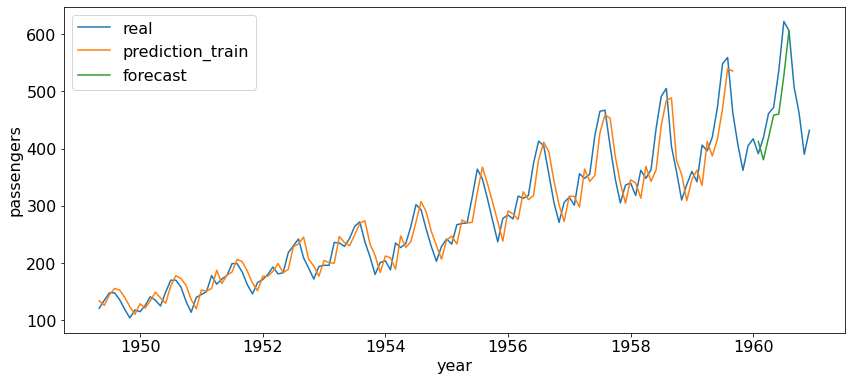

In [ ]:
PlotForecast(model, df, scaler, X_train_new, X_test_new, y_train_new, y_test_new, 4)

Actually, our prediction did not change that much. It still seems to be lagged.

# Using a new dataset

Now, let's try to predict using a different dataset:

In [ ]:
bikes_df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')

bikes_df.head( )

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


This time, we have information about the date and hour, and the number of bikes being rented. Also, we have different information about the time of the day. First, let's transform the date column to datetime format:

In [ ]:
bikes_df.datas = pd.to_datetime(bikes_df.datas)

Let's visualize our data:

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

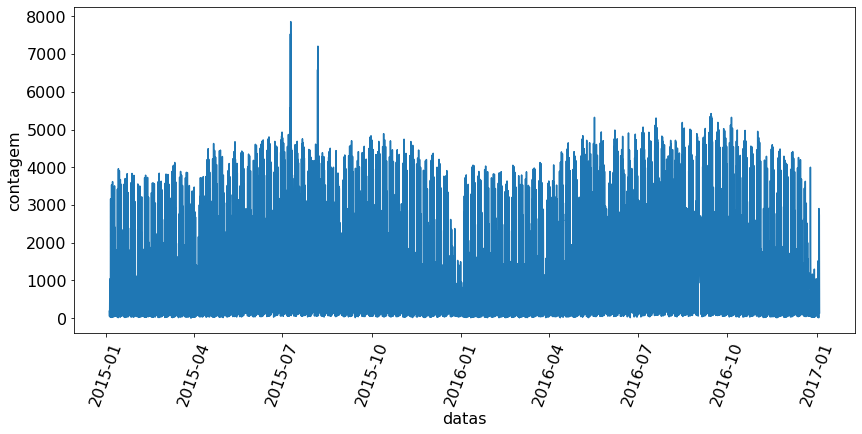

In [ ]:
sns.lineplot(x = 'datas', y = 'contagem', data = bikes_df)
plt.xticks(rotation = 70)

Our data seems to be much more complex. Now, we will make the scaling of our features. Note that we will build our network similar to the previous one: the same feature will serve as the explicative and target feature. Thus, we will only consider this feature in the scaling:

In [ ]:
scaler = MinMaxScaler( )
num_rent_bikes = scaler.fit_transform(bikes_df.contagem.values.reshape(-1, 1))

num_rent_bikes

array([[0.02315522],
       [0.01755725],
       [0.01704835],
       ...,
       [0.04287532],
       [0.02849873],
       [0.01768448]])

Now, let's separate our dataset into train and test sets:

In [ ]:
train_size = int(len(num_rent_bikes)*0.9)

y_train = num_rent_bikes[:train_size]
y_test  = num_rent_bikes[train_size:]

We can visualize our splits using:

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

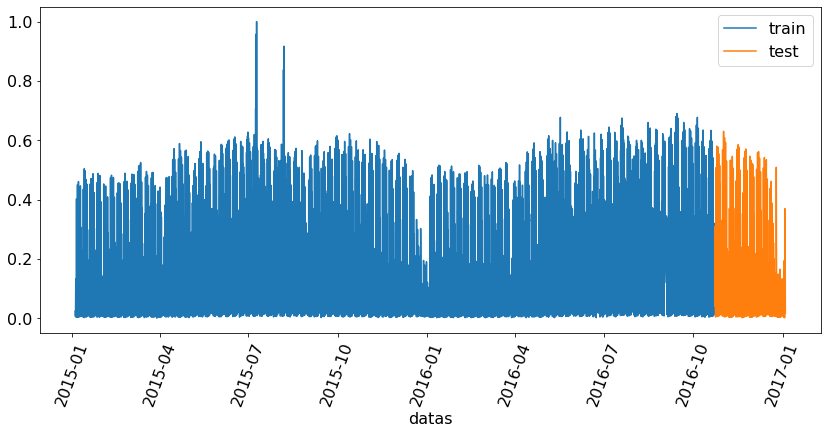

In [ ]:
sns.lineplot(x = 'datas', y = y_train[:, 0], data = bikes_df[:train_size], label = 'train')
sns.lineplot(x = 'datas', y = y_test[:, 0] , data = bikes_df[train_size:], label = 'test')
plt.xticks(rotation = 70)

To create our explicative feature (which is the lagged target feature), we can do:

In [ ]:
vector = pd.DataFrame(y_train)[0]

X_train_new, y_train_new = separate_data(vector, 10)

In [ ]:
vector = pd.DataFrame(y_test)[0]

X_test_new, y_test_new = separate_data(vector, 10)

Note that, this time, we are getting the explicative features considering 10 lags. 

# Recurrent networks

This time, we will use a different type of network to solve our problem: we will use a recurrent network. The recurrent network understands the sequential behavior of the time series, where each value is dependent on the previous value. 

To use recurrent networks, we need to include a new attribute to our data, related to the number of attributes considering in each step:

In [ ]:
X_train_new = X_train_new.reshape((X_train_new.shape[0], X_train_new.shape[1], 1))

In [ ]:
X_test_new  = X_test_new.reshape((X_test_new.shape[0], X_test_new.shape[1], 1))

## Long-Short Term Memory

Now, let's form our new neural network. This time, we will not use Dense layers, but rather LSTM layers. We can do that using:

In [ ]:
X_train_new.shape[2]

1

In [ ]:
SEED = 101
tf.random.set_seed(SEED)

model = keras.models.Sequential([
                                 keras.layers.LSTM(128, input_shape = ((X_train_new.shape[1], X_train_new.shape[2]))), 
                                 keras.layers.Dense(1)
])

callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100)]

model.compile(loss = 'mean_squared_error', optimizer = 'RMSProp')

model.summary( )

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


Now, our LSTM layer has a very high number of parameters. For the output layer we still used a Dense layer. Also, we are using the ```RMSProp``` optimizer, which helps with exploding gradients. Note that the LSTM also has some activation functions, but we are using the default activation. To get the default parameters, we can use:

In [ ]:
model.get_config( )

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 10, 1),
    'dtype': 'float32',
    'name': 'lstm_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'LSTM',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'batch_input_shape': (None, 10, 1),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dropout': 0.0,
    'dtype': 'float32',
    'go_backwards': False,
    'implementation': 2,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'lstm',
    'recurrent_activation': 'sigmoid',
    'recurrent_constraint': None,
    'recurrent_dropout': 0.0,
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'recurrent_regularizer': None,
    'return_sequences': False,
    'return_state

Finally, we can fit our LSTM using:

In [ ]:
result = model.fit(X_train_new, y_train_new, validation_data = (X_test_new, y_test_new), epochs = 100, callbacks = callbacks, verbose = 0)

Nice! Now, let's make our predictions:

In [ ]:
y_train_pred = model.predict(X_train_new)
y_test_pred  = model.predict(X_test_new)

Finally, we can plot our training data and the prediction using:

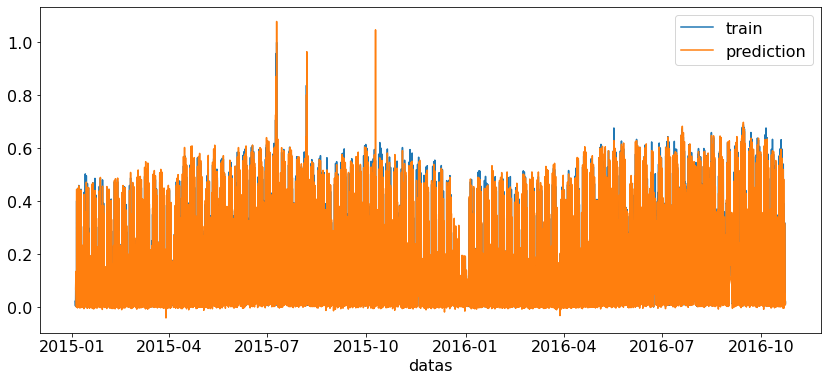

In [ ]:
sns.lineplot(x = 'datas', y = y_train[:, 0], data = bikes_df[0:train_size], label = 'train')
sns.lineplot(x = 'datas', y = y_train_pred[:, 0], data = bikes_df[10:15672], label = 'prediction')

Since we have a lot of data, it is very hard to understand what is going on. However, it seems that our prediction is very good. Let's see only the final months in our training set:

(736177.0, 736238.0)

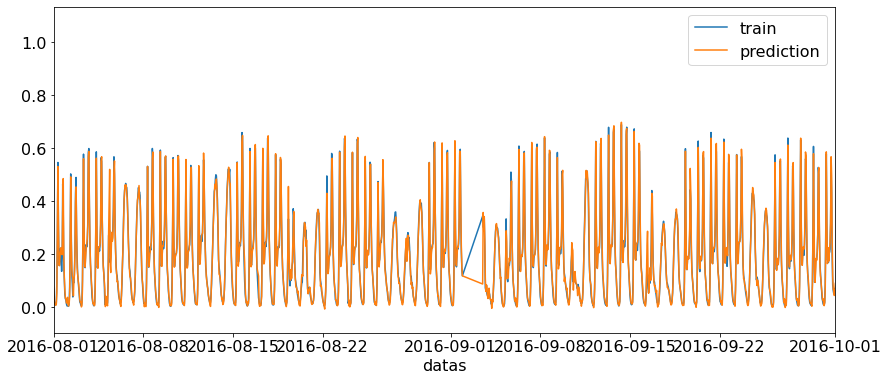

In [ ]:
sns.lineplot(x = 'datas', y = y_train[:, 0], data = bikes_df[0:train_size], label = 'train')
sns.lineplot(x = 'datas', y = y_train_pred[:, 0], data = bikes_df[10:15672], label = 'prediction')
plt.xlim([datetime.date(2016, 8, 1), datetime.date(2016, 10, 1)])

Nice! Our prediction seems to be very well fitted to the training data! What about the test set?

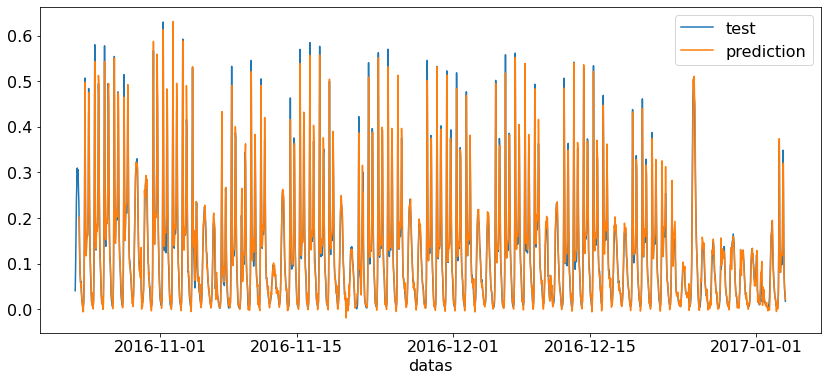

In [ ]:
sns.lineplot(x = 'datas', y = y_test[:, 0], data = bikes_df[train_size:], label = 'test')
sns.lineplot(x = 'datas', y = y_test_pred[:, 0], data = bikes_df[train_size+10:], label = 'prediction')

Again, a very good fit!

## Gated Recurrent Unit

The Gated Recurrent Unit is a recurrent network which is more simple than the LSTM, but still very powerful. Its simplicity helps in making its training faster and more efficient, as it has less parameters.

Let's use a new model with a GRU layer:

In [ ]:
SEED = 101
tf.random.set_seed(SEED)

model = keras.models.Sequential([
                                 keras.layers.GRU(128, input_shape = ((X_train_new.shape[1], X_train_new.shape[2]))), 
                                 keras.layers.Dense(1)
])

callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100)]

model.compile(loss = 'mean_squared_error', optimizer = 'RMSProp')

model.summary( )

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


So, while the LSTM had more than 66000 parameters, the GRU only has 50433. 

Now, let's fit our GRU:

In [ ]:
result = model.fit(X_train_new, y_train_new, validation_data = (X_test_new, y_test_new), epochs = 100, callbacks = callbacks, verbose = 0)

Now, let's plot the prediction for the final months of the training set:

(736177.0, 736238.0)

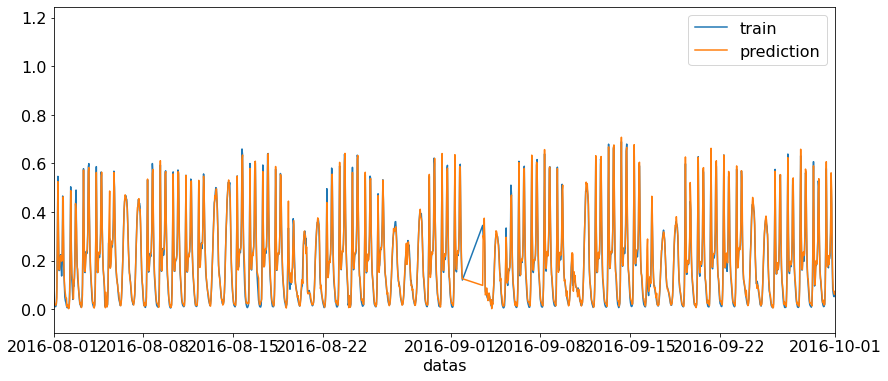

In [ ]:
y_train_pred = model.predict(X_train_new)
sns.lineplot(x = 'datas', y = y_train[:, 0], data = bikes_df[0:train_size], label = 'train')
sns.lineplot(x = 'datas', y = y_train_pred[:, 0], data = bikes_df[10:15672], label = 'prediction')
plt.xlim([datetime.date(2016, 8, 1), datetime.date(2016, 10, 1)])

Even though the GRU layer makes our more more simple and efficient, our prediction was actually very similar. Now, let's plot the results for the test set:

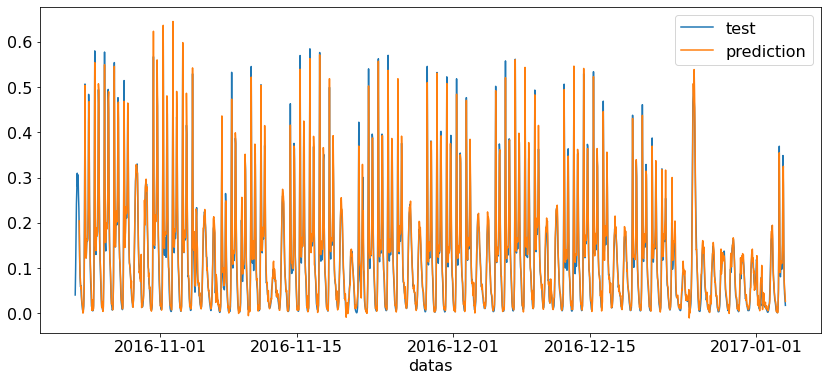

In [ ]:
y_test_pred  = model.predict(X_test_new)
sns.lineplot(x = 'datas', y = y_test[:, 0], data = bikes_df[train_size:], label = 'test')
sns.lineplot(x = 'datas', y = y_test_pred[:, 0], data = bikes_df[train_size+10:], label = 'prediction')

Again, a very good result!